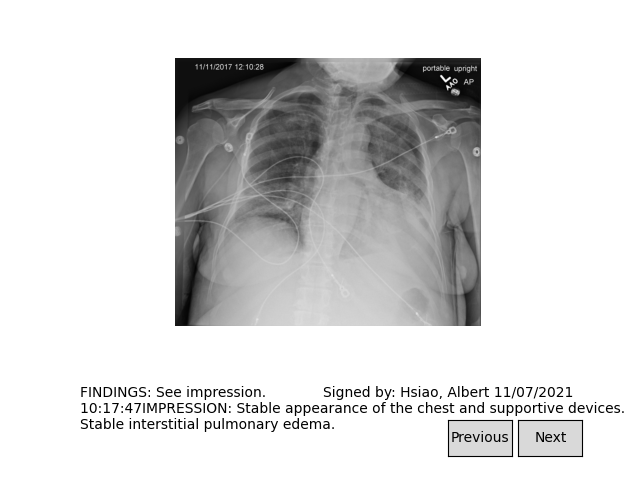

In [16]:
%matplotlib widget
import matplotlib.pyplot as plt
import matplotlib.widgets as widgets
import pandas as pd
import numpy as np
from PIL import Image

fig, ax = plt.subplots(nrows=2, height_ratios=[0.8,0.2])
# real_rep = pd.read_json('/home/llm-hackathon/LLaVA/muchan/', lines=True)
gen_rep = pd.read_json('/home/llm-hackathon/LLaVA/muchan/testset_answer_finding_impression.jsonl', lines=True)

i = 0
image_fp = '/data/UCSD_cxr/jpg/'

def norm_img(image_data):
    return ((image_data - image_data.min()) / (image_data.ptp()) * 255).astype(np.uint8)

i = 0
report_text = ax[1].text(0, 0, s=gen_rep.loc[i, 'text'],wrap=True)
def display_img():
    global i
    ax[0].clear()
    im_fp = '/data/UCSD_cxr/jpg/' + gen_rep.loc[i, 'question_id']
    img = Image.open(im_fp)
    n_img = norm_img(np.asarray(img))
    report_text.set(text=gen_rep.loc[i, 'text'])
    ax[0].imshow(n_img, )
    i += 1
    ax[0].axis('off')
    ax[1].axis('off')
    plt.draw()

def prev(event):
    global i
    i -= 1
    display_img()

def next(event):
    global i
    i += 1
    display_img()

axprev = fig.add_axes([0.7, 0.05, 0.1, 0.075])
axnext = fig.add_axes([0.81, 0.05, 0.1, 0.075])
bnext = widgets.Button(axnext, 'Next')
bnext.on_clicked(next)
bprev = widgets.Button(axprev, 'Previous')
bprev.on_clicked(prev)
# prev_button = widgets.Button(ax[2], label='Prev')
# next_button = widgets.Button(ax[2], label='Next')
# prev_button.on_clicked(prev)
# next_button.on_clicked(next)

display_img()
